In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [3]:
ubuntu1804 = pd.read_csv('../benchmark_results_data/evm_benchmarks_geth-ubuntu18.04.csv')
ubuntu1804.rename(columns={'total_time': 'total_time'}, inplace=True)
ubuntu1804 = ubuntu1804.groupby('test_name')['total_time'].mean()

In [4]:
ubuntu2004 = pd.read_csv('../benchmark_results_data/evm_benchmarks_geth-ubuntu20.04.csv')
ubuntu2004 = ubuntu2004.groupby('test_name')['total_time'].mean()
ubuntu2004.rename(index={1: "total_time_2004"})
ubuntu2004.head(5)

test_name
add0       0.000668
add1       0.000666
add3       0.000664
add4       0.000684
addmod0    0.000662
Name: total_time, dtype: float64

In [5]:
ubuntu2110 = pd.read_csv('../benchmark_results_data/evm_benchmarks_geth-ubuntu21.10.csv')
ubuntu2110 = ubuntu2110.groupby('test_name')['total_time'].mean()
ubuntu2110.rename(index={1: "total_time_2110"})
ubuntu2110.head(5)

test_name
add0       0.000715
add1       0.000697
add3       0.000702
add4       0.000713
addmod0    0.000708
Name: total_time, dtype: float64

In [6]:
kevm_ubuntu_1804 = pd.read_csv('../benchmark_results_data/evm_benchmarks_kevm-ubuntu18.04.csv')
kevm_ubuntu_1804 = kevm_ubuntu_1804.groupby('test_name')['total_time'].mean()
kevm_ubuntu_1804.rename(index={1: "total_time_kevm_1804"})
kevm_ubuntu_1804.head(5)

test_name
add0       0.000740
add1       0.000717
add3       0.000712
add4       0.000729
addmod0    0.000771
Name: total_time, dtype: float64

In [ ]:
df_kevm_geth = pd.merge(ubuntu1804, kevm_ubuntu_1804,on='test_name')
df_kevm_geth = df_kevm_geth.rename(columns={"total_time_x": "Geth Ubuntu 18.04", "total_time_y": "Kevm Ubuntu 18.04"}, errors="raise")

index = df_kevm_geth.index
number_of_rows = len(index)

number_of_colors = 25

row_count = 0
while (row_count < number_of_rows):
    
    df_fragment = df_kevm_geth.head(5)
    row_count = row_count + 5
    df_kevm_geth = df_kevm_geth.iloc[5:]
    colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]
    ax = df_fragment.plot(kind="bar",  title='Comparison of Opcode Benchmark Performance for Geth & Kevm Client', color=colors, figsize=(20,10))
    ax.set_xlabel("Opcode")
    ax.set_ylabel("Speed (seconds)")

: 

c:\Users\Chris\Desktop\SmartContractBenchmarking\venv\lib\site-packages\pandas\plotting\_matplotlib\core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


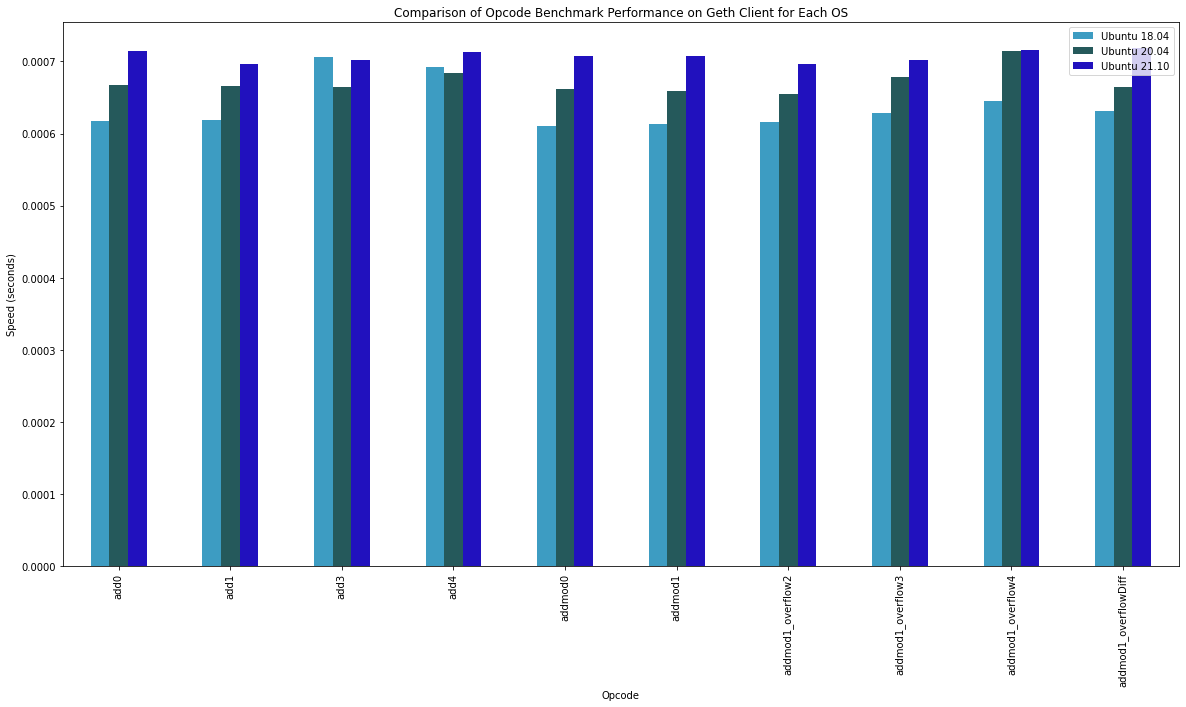

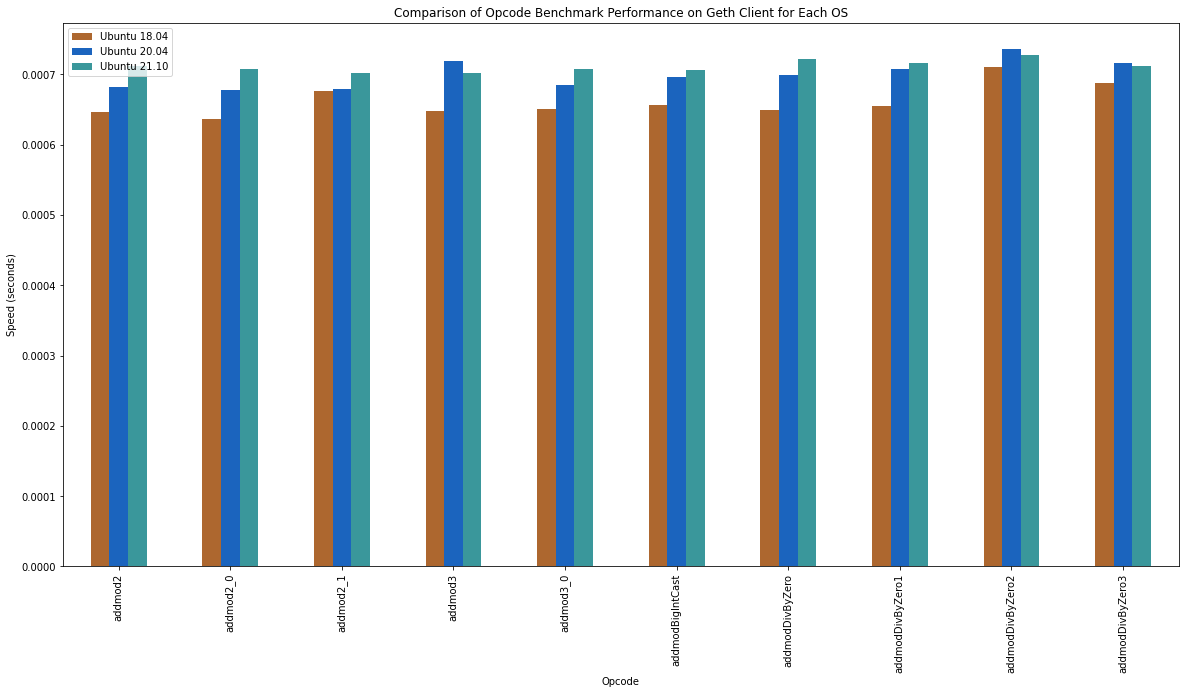

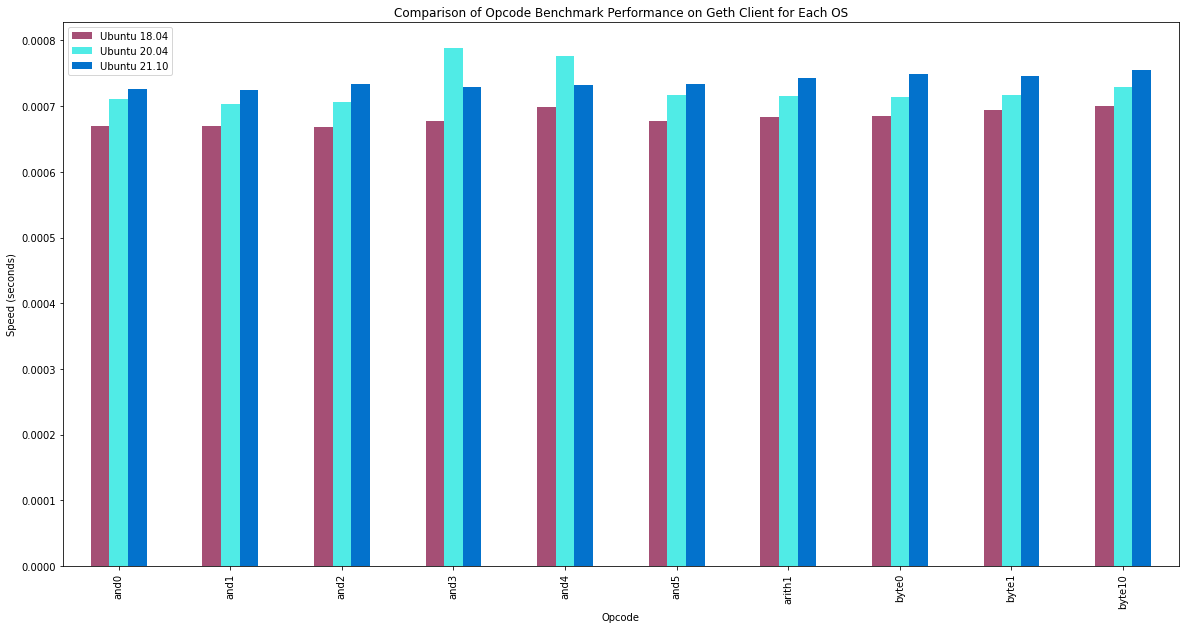

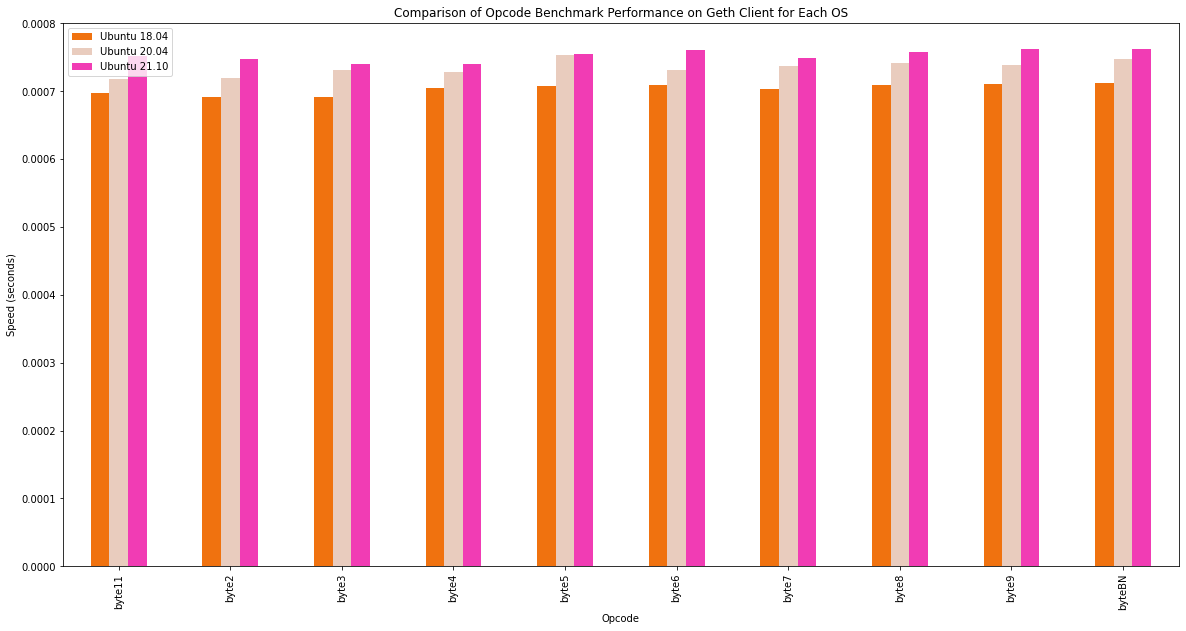

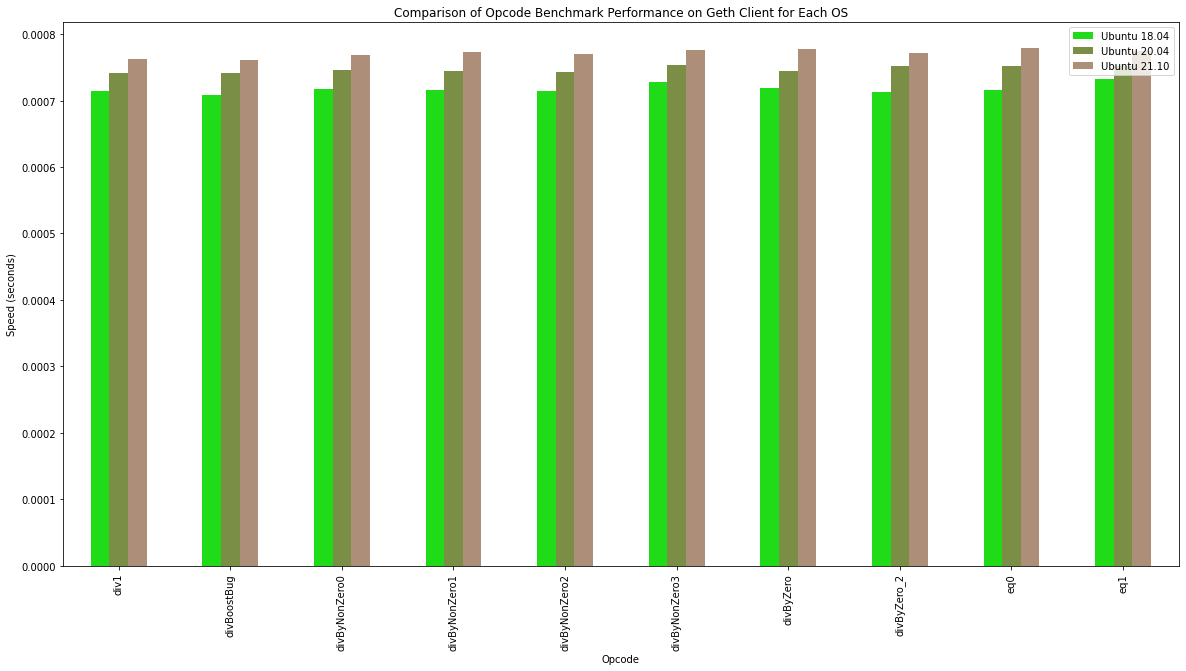

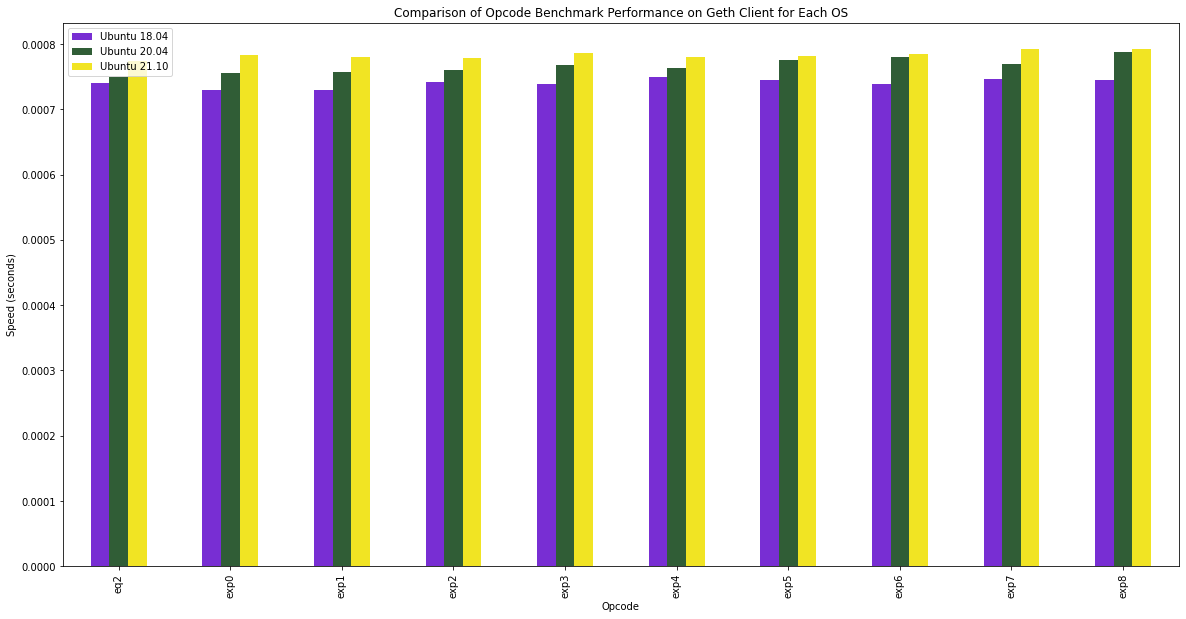

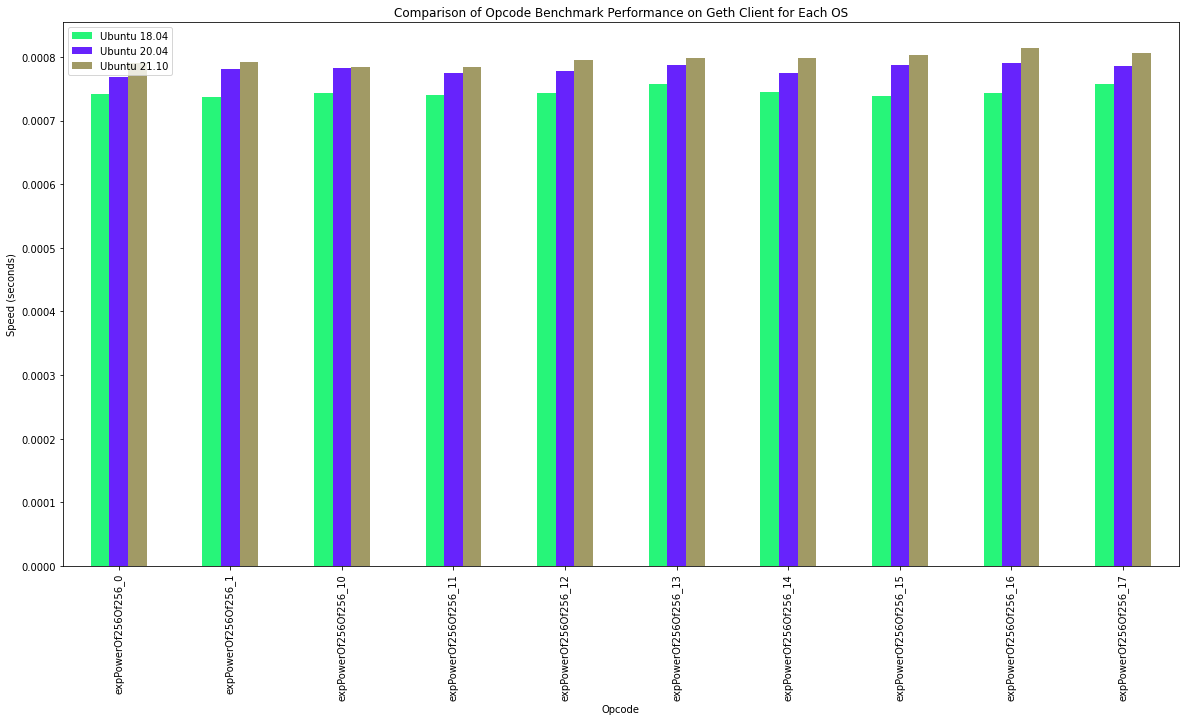

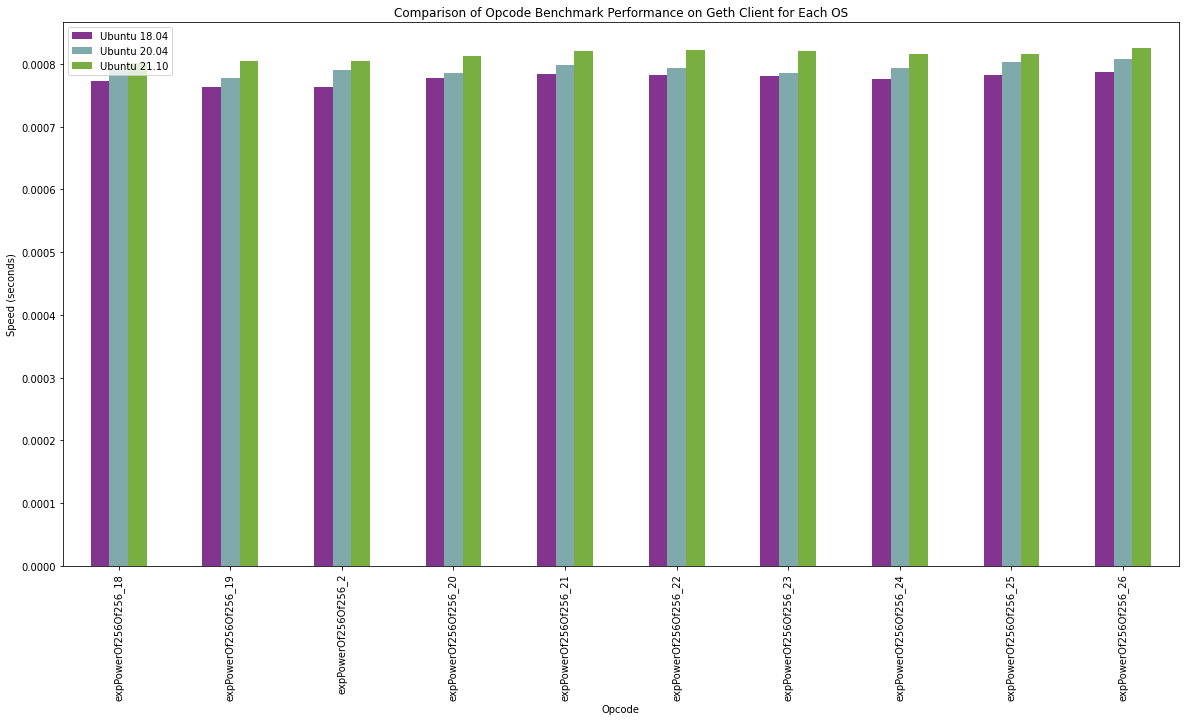

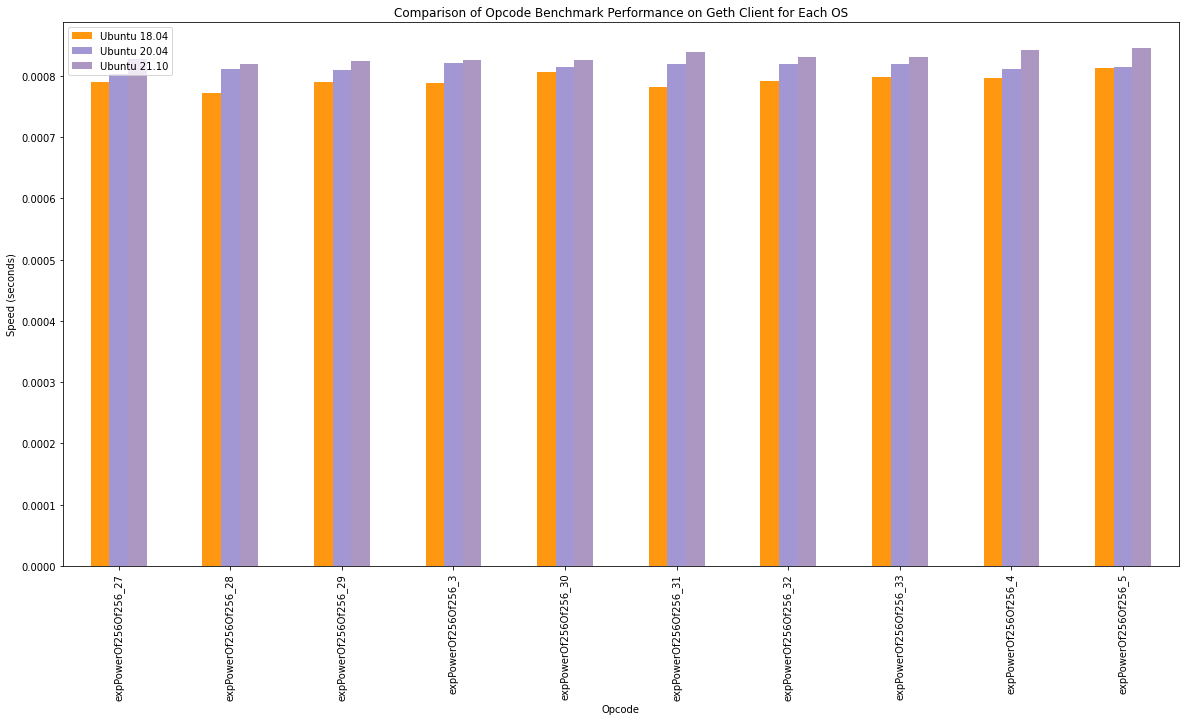

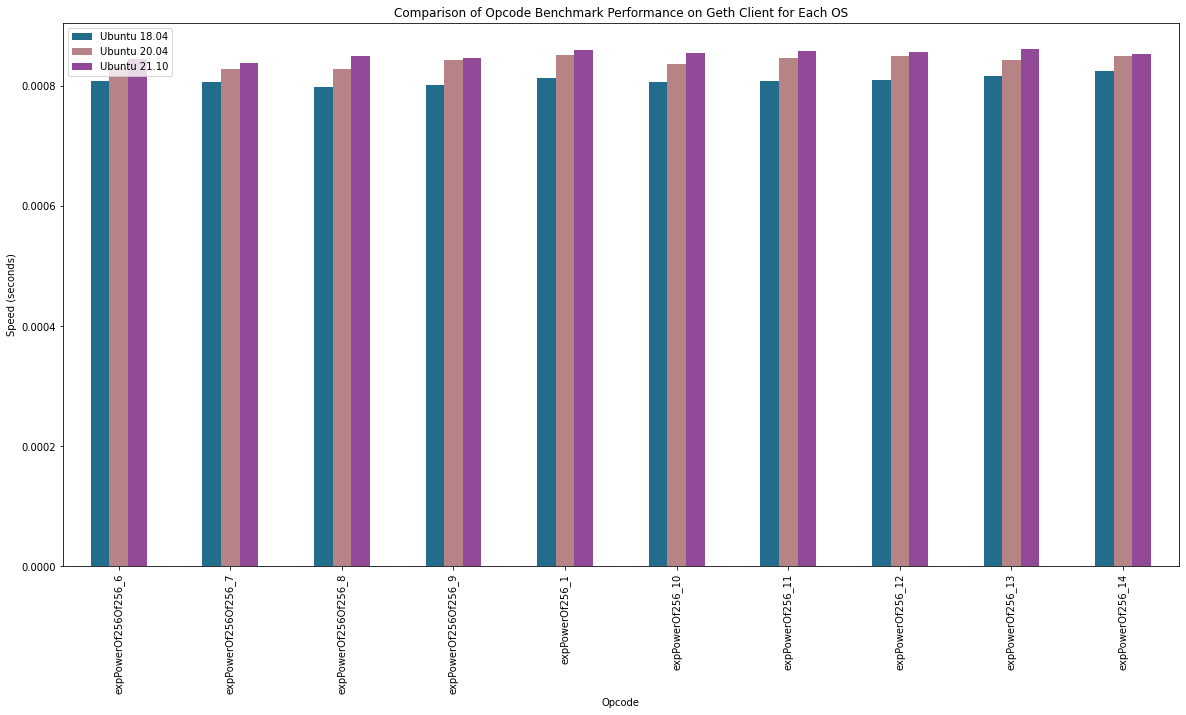

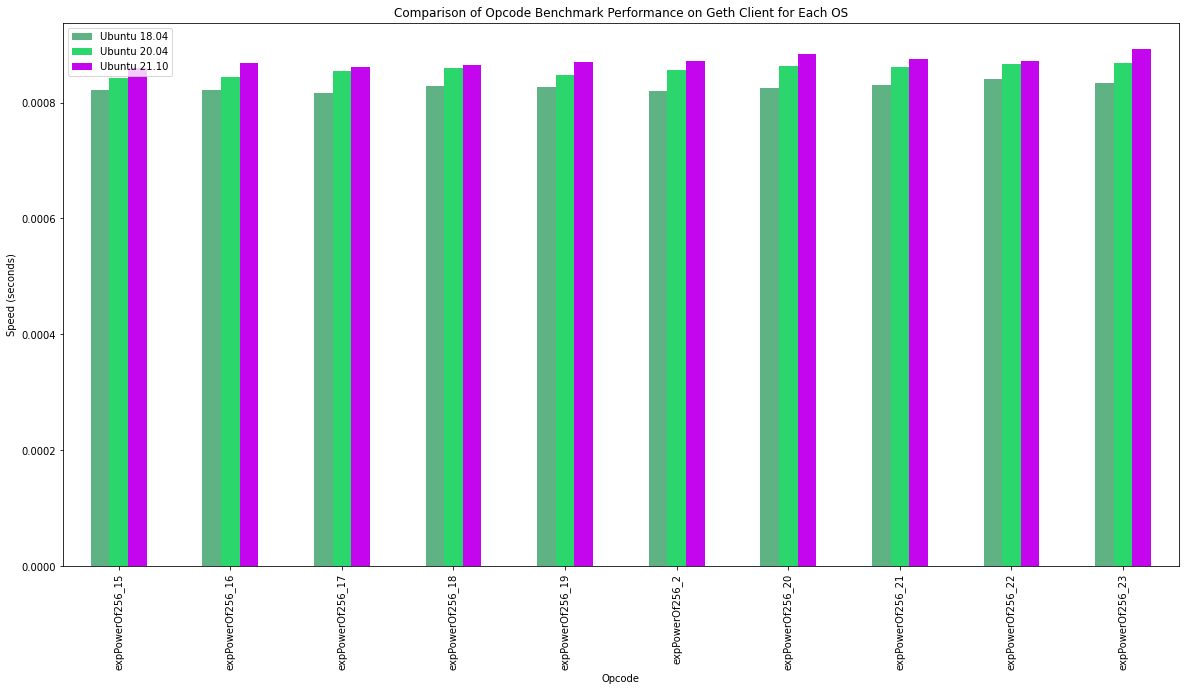

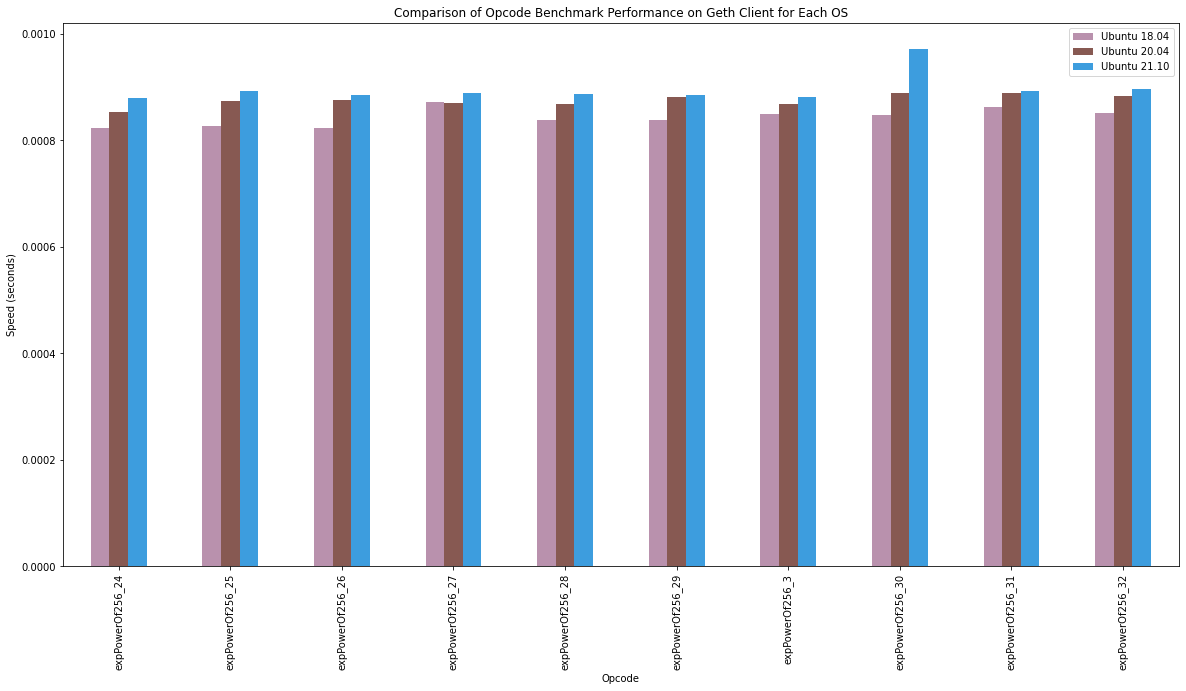

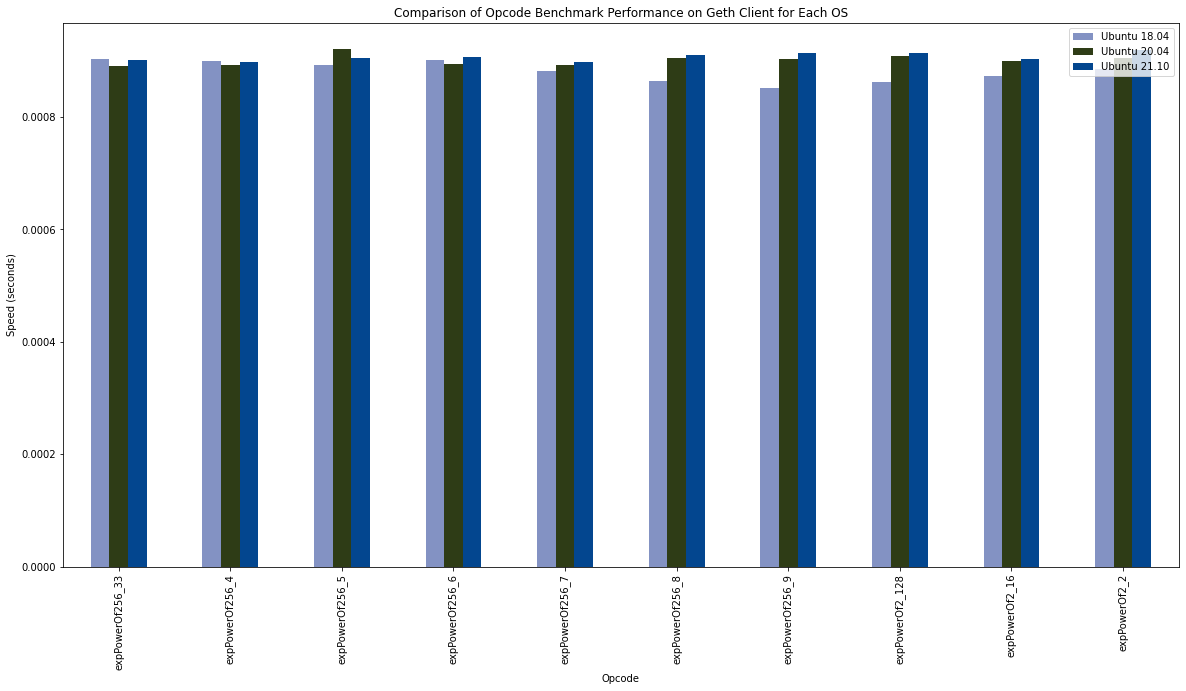

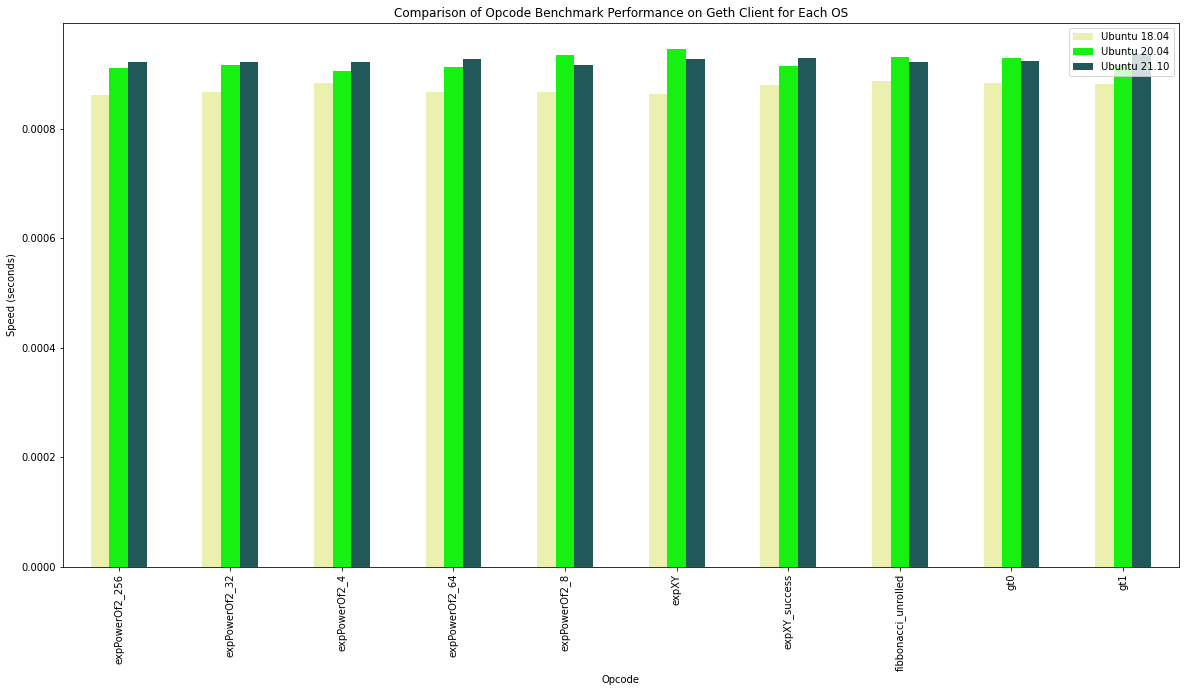

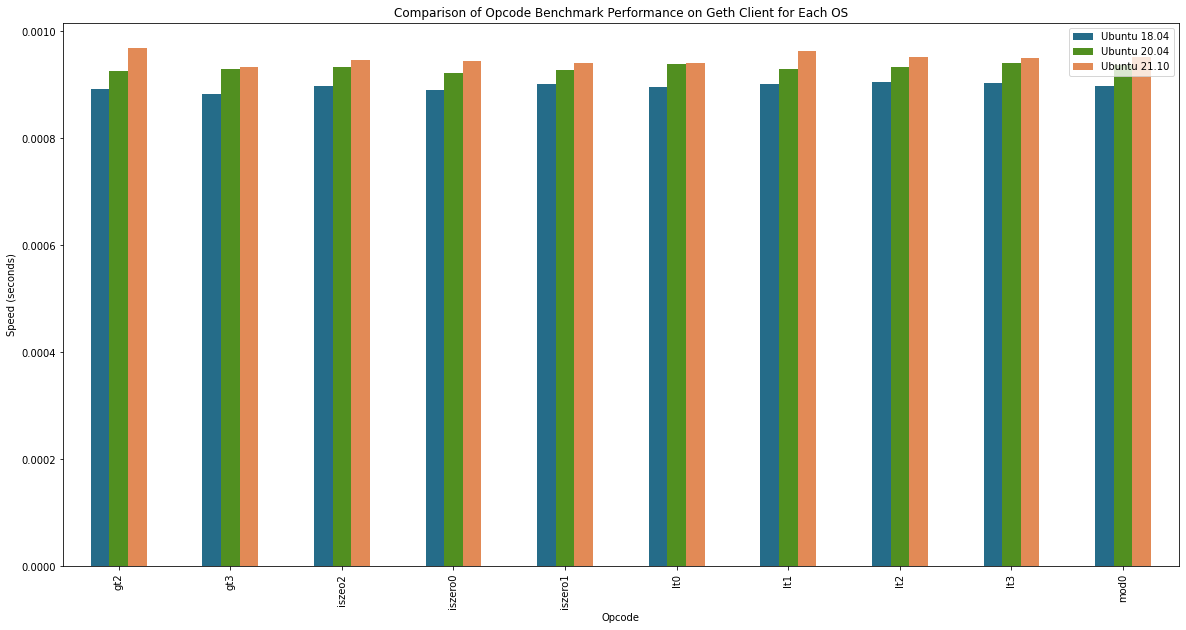

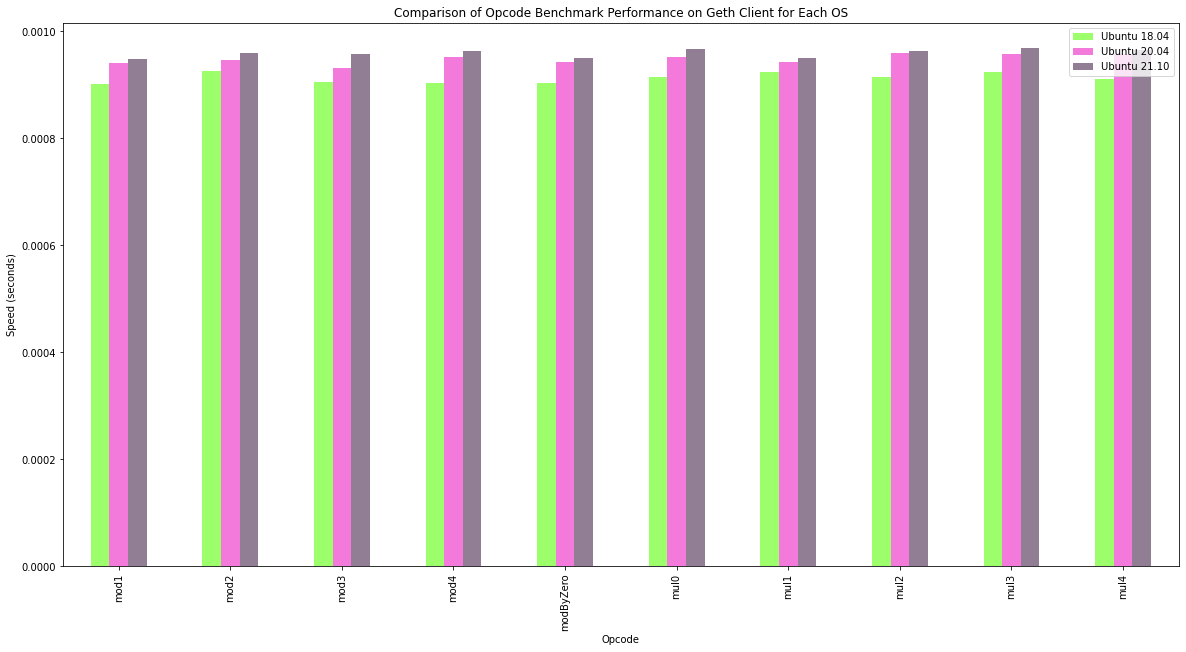

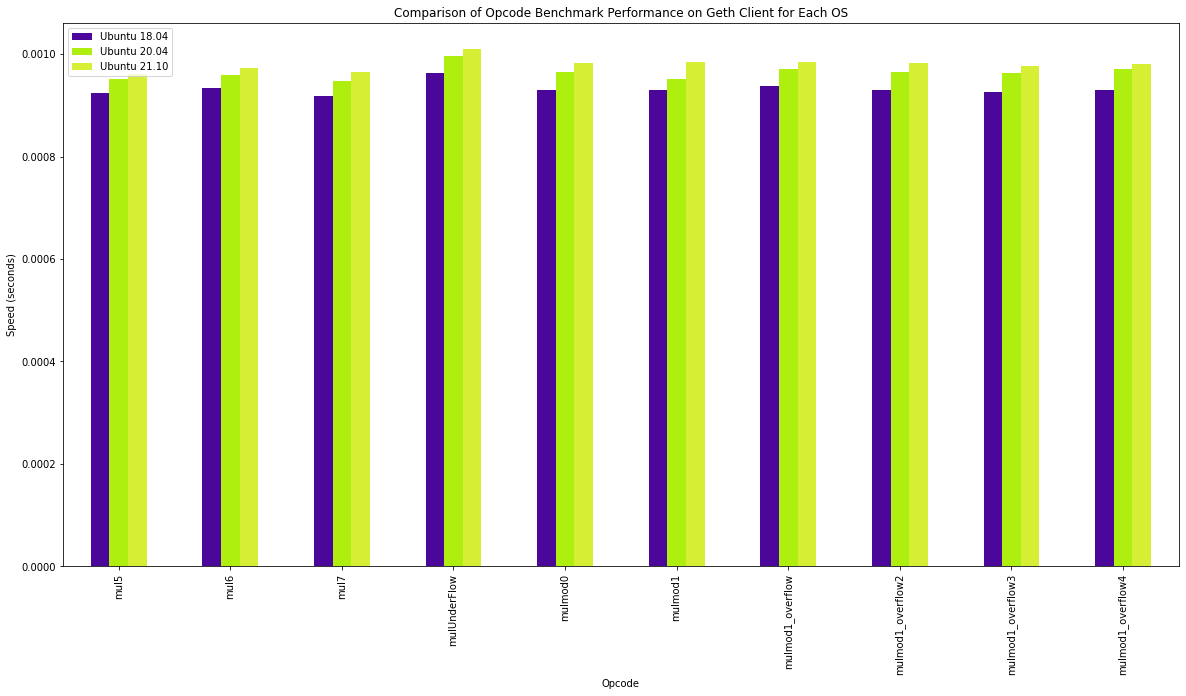

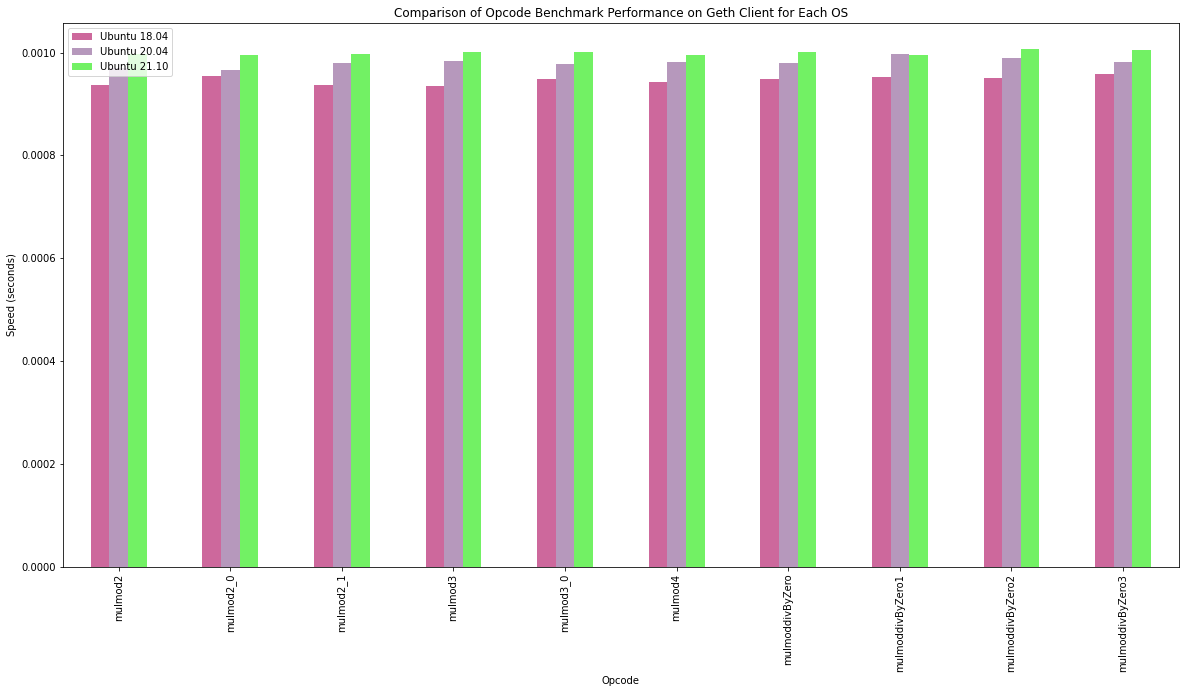

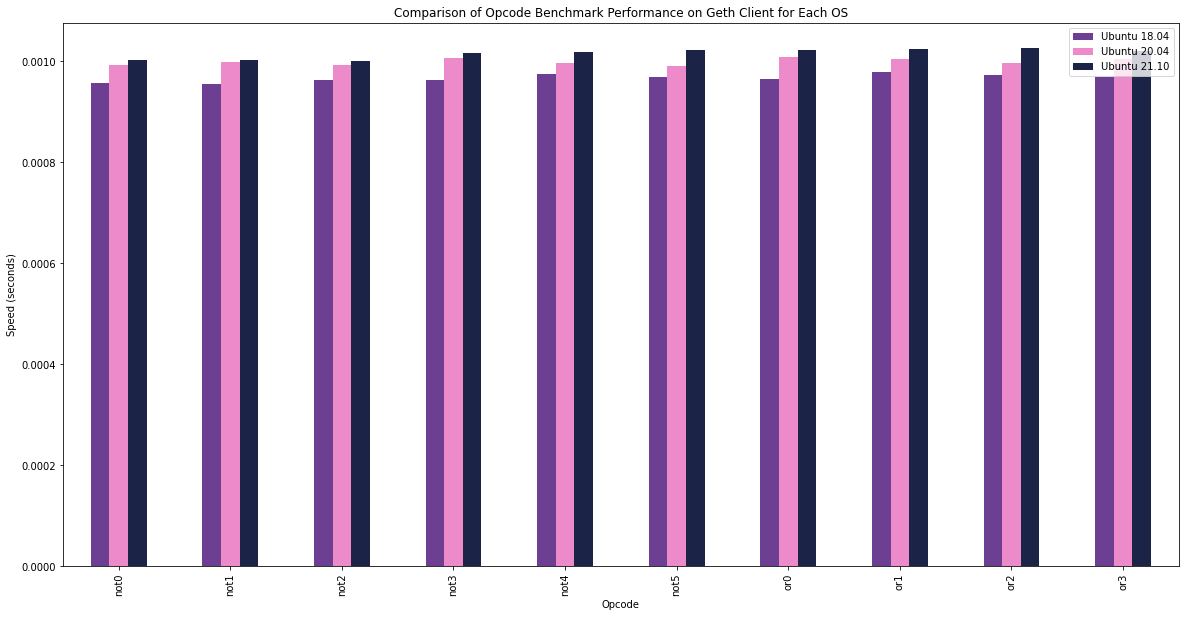

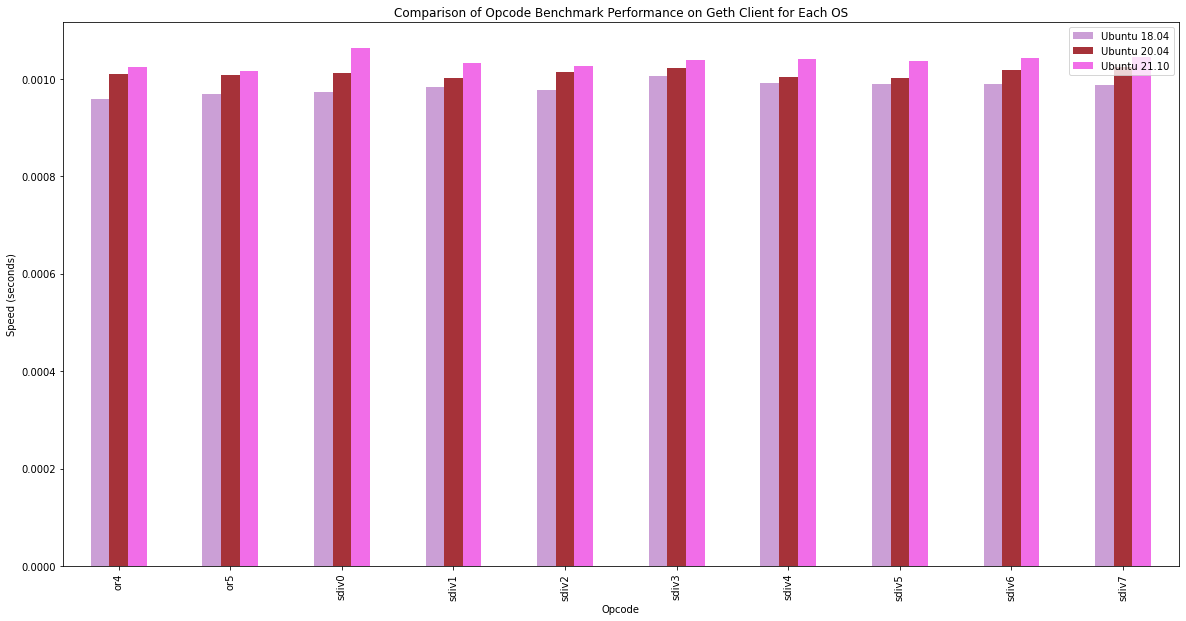

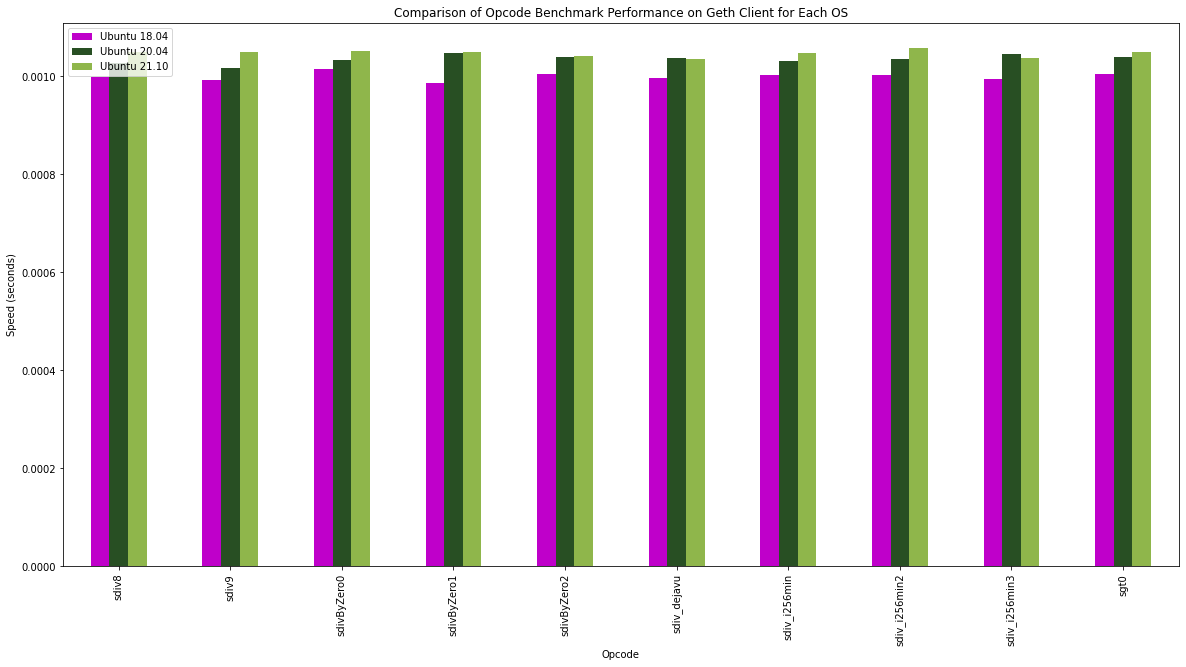

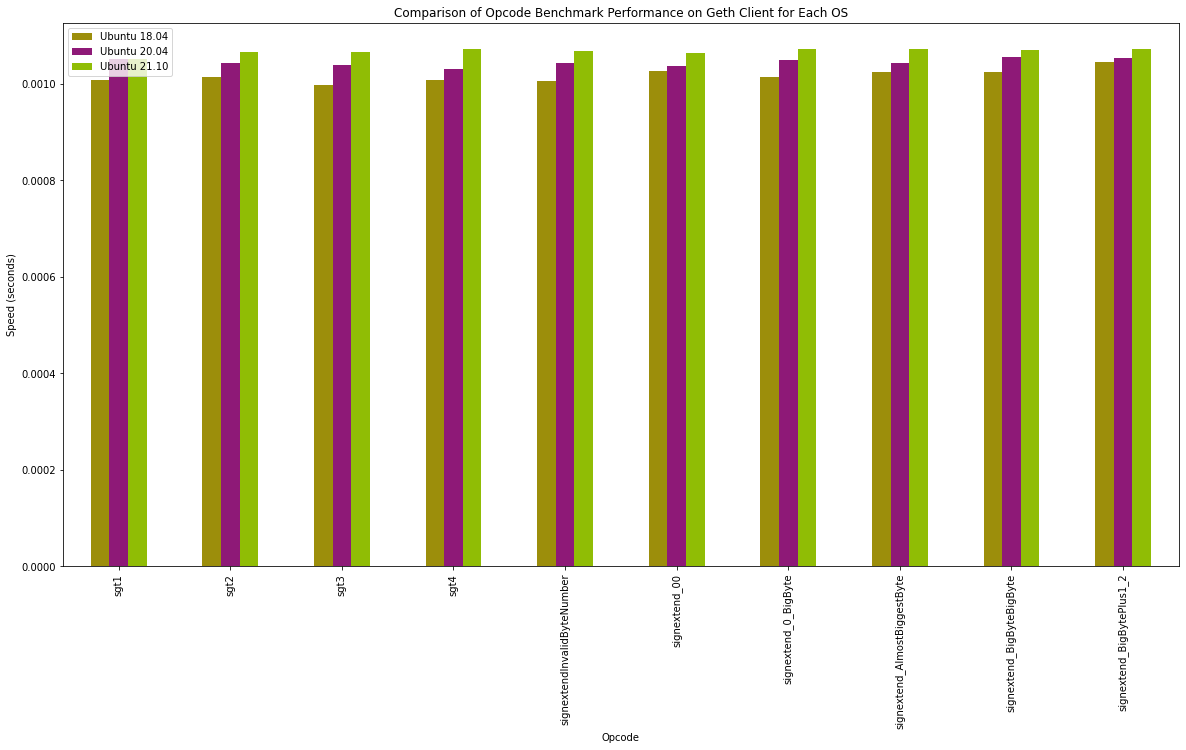

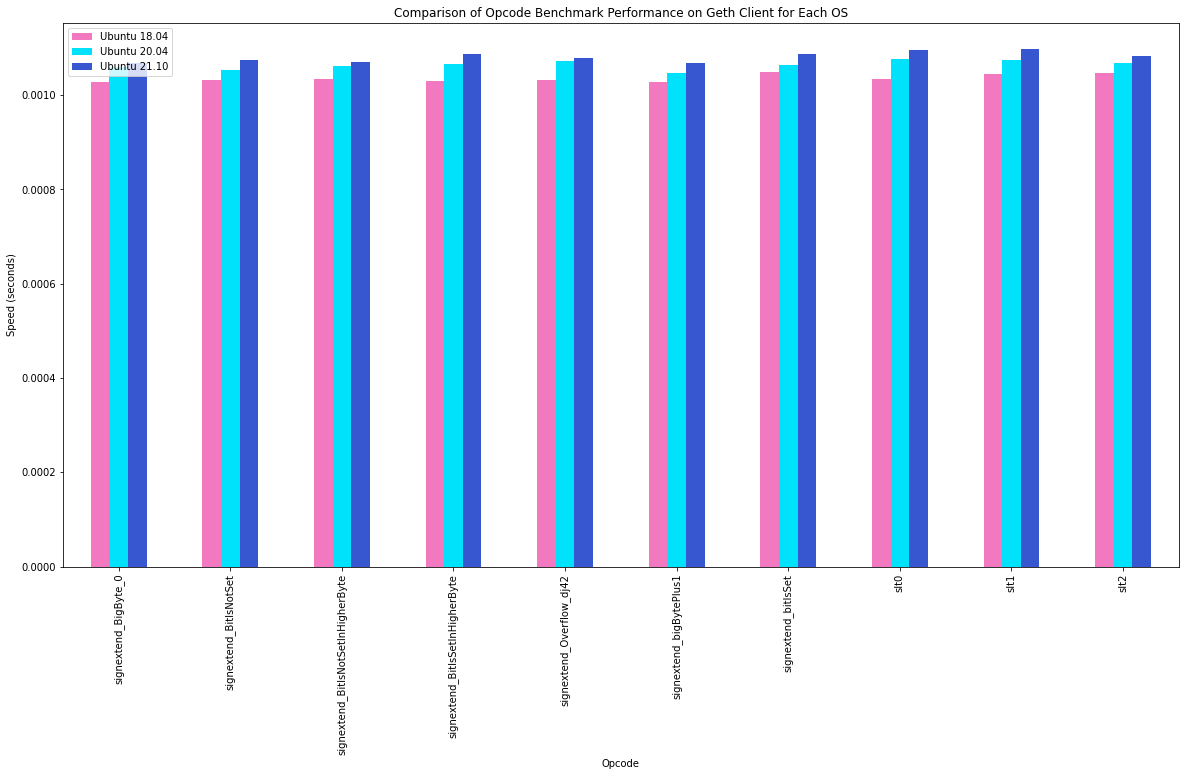

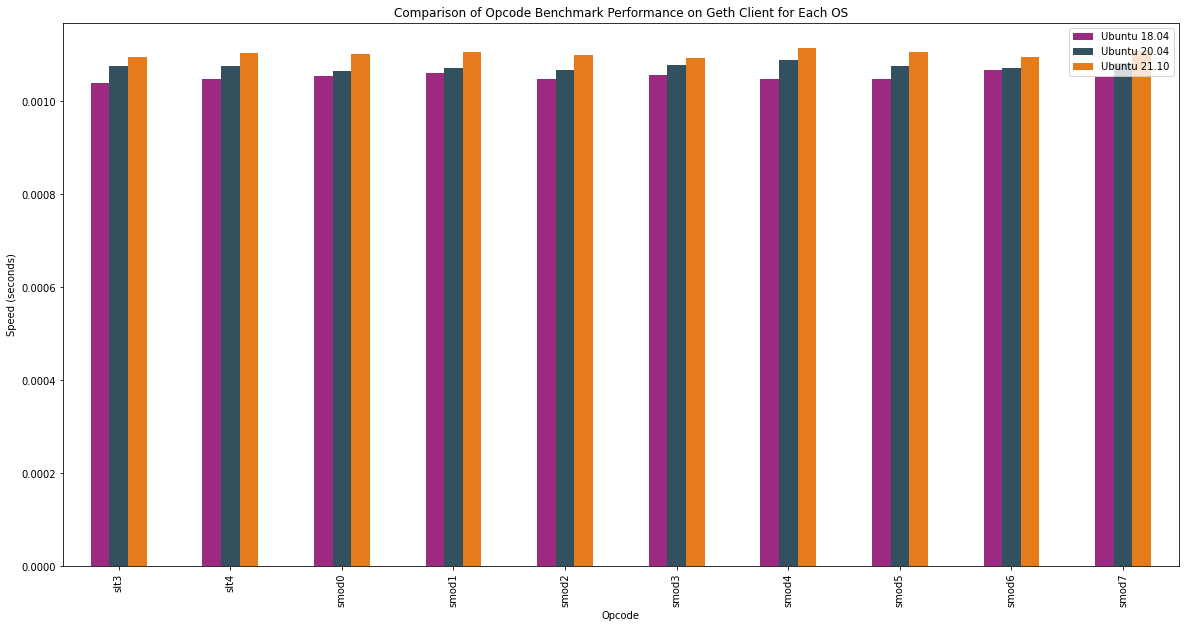

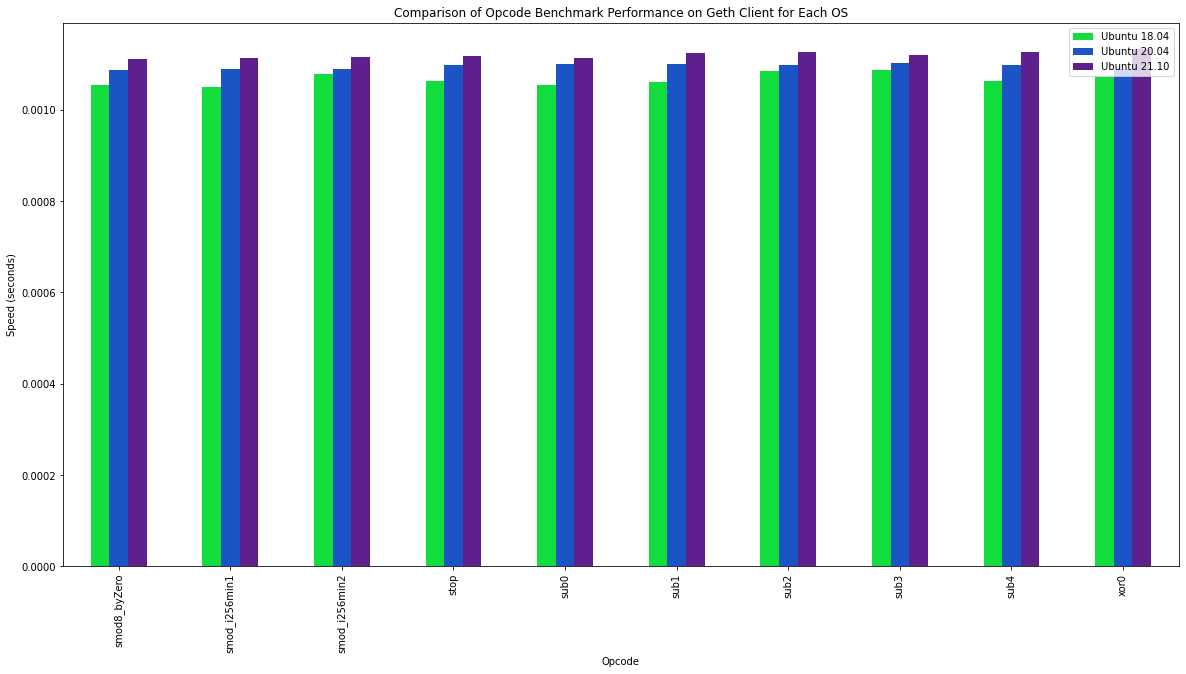

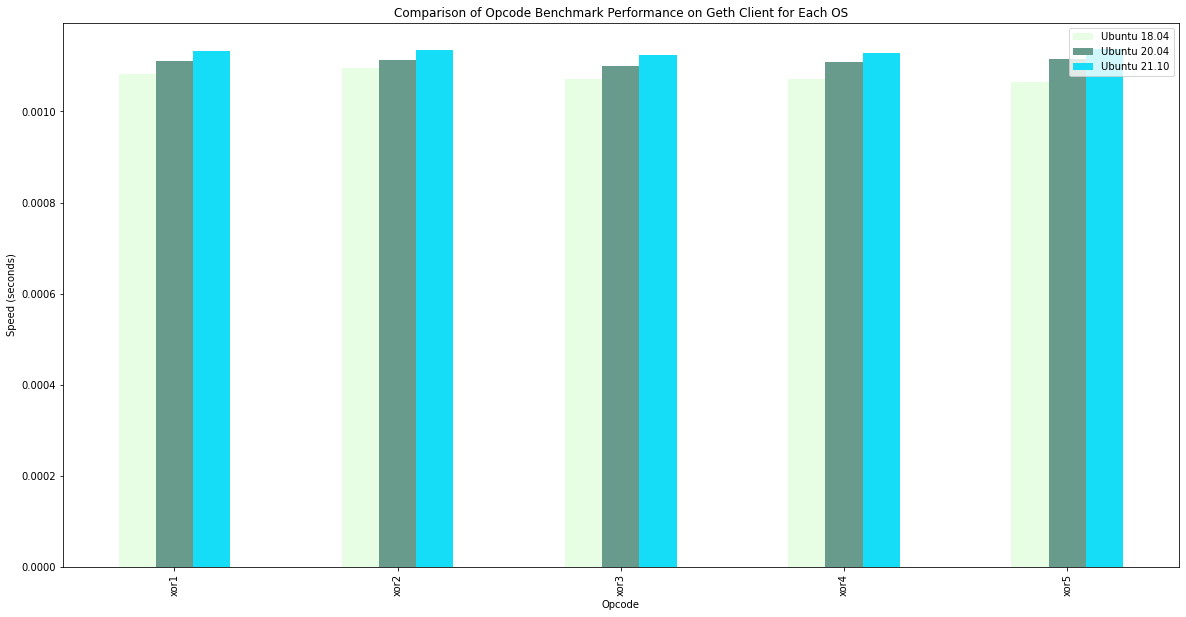

In [ ]:

df = pd.merge(ubuntu1804, ubuntu2004,on='test_name')
df = pd.merge(df, ubuntu2110,on='test_name')
df = df.rename(columns={"total_time_x": "Ubuntu 18.04", "total_time_y": "Ubuntu 20.04", "total_time": "Ubuntu 21.10"}, errors="raise")
#df = df.head(4)

index = df.index
number_of_rows = len(index)

row_count = 0
while (row_count < number_of_rows):
    df_fragment = df.head(10)
    row_count = row_count + 10
    df = df.iloc[10:]
    colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
        for i in range(number_of_colors)]
    ax = df_fragment.plot(kind="bar",  title='Comparison of Opcode Benchmark Performance on Geth Client for Each OS', color=colors, figsize=(20,10))
    ax.set_xlabel("Opcode")
    ax.set_ylabel("Speed (seconds)")
